In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
from google.colab import drive


drive.mount('/content/drive')


file_path = '/content/drive/My Drive/iaa/precos_carros_brasil.csv'



Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
#a. Carregue a base de dados media_precos_carros_brasil.csv
def extractData(dataBaseFile):
    db = pd.read_csv(dataBaseFile)
    return db

def treatData(db):
    # d Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo
    # de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

    colunas_numericas = db.select_dtypes(include=[np.number]).columns
    colunas_categoricas = db.select_dtypes(exclude=[np.number]).columns

    # d.1 -> colunas numéricas
    print("Resumo estatístico das colunas numéricas:")
    print(db[colunas_numericas].describe())  # Estatísticas descritivas das variáveis numéricas

    # d.2 -> categóricas
    print("\nResumo das colunas categóricas:")
    print(db[colunas_categoricas].describe())  # Resumo das variáveis categóricas

    return db

def identifyNan(value):
    value = np.nan
    return value

def patternColum(db):
    db = pd.DataFrame(db)
    colunas = db.columns
    print(colunas)


    colunas_lista = list(colunas)

    # b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes
    # b.1 -> se a coluna ou linha inteira for composta por valor
    db_cleaned = db.dropna(axis=1, how='all')
    db_cleaned = db.dropna(axis=0, how='all')


    # b.2 -> Atribui um novo valor aos dados Nan presente em colunas e linhas nao nulas de acordo com  o tipo de dado
    for coluna_nome in colunas_lista:
        for index, value in db[coluna_nome].items():
            if pd.isna(value):
                if coluna_nome in ("year_of_reference", "year_model", "avg_price_brl"):
                    value = 0
                else:
                    value = "Não possui"

    return db_cleaned



In [4]:
db = extractData(file_path)
#c. Verifique se há dados duplicados nos dados
duplicates = db.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicates}")
db = patternColum(db)
treatData(db)


<ipython-input-3-f34971953ffd>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv(dataBaseFile)


Número de linhas duplicadas: 65246
Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')
Resumo estatístico das colunas numéricas:
       year_of_reference     year_model  avg_price_brl
count      202297.000000  202297.000000  202297.000000
mean         2021.564694    2011.271527   52756.909153
std             0.571903       6.376234   51628.677716
min          2021.000000    2000.000000    6647.000000
25%          2021.000000    2006.000000   22855.000000
50%          2022.000000    2012.000000   38027.000000
75%          2022.000000    2016.000000   64064.000000
max          2023.000000    2023.000000  979358.000000

Resumo das colunas categóricas:
       month_of_reference fipe_code authentication   brand  \
count              202297    202297         202297  202297   
unique                 12      2091         202295       6   
top        

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0
...,...,...,...,...,...,...,...,...,...,...,...
202292,2023.0,January,005538-7,ccv3mvxnsz0dqw,VW - VolksWagen,Saveiro Robust 1.6 Total Flex 16V,Gasoline,manual,"1,6",2023.0,86038.0
202293,2023.0,January,005539-5,chmwfg3l5hbp,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,1,2023.0,95997.0
202294,2023.0,January,005539-5,cdj27srtcvcdqw,VW - VolksWagen,Gol Last Edition 1.0 Flex 12V 5p,Gasoline,manual,1,2023.0,87828.0
202295,2023.0,January,005540-9,9w64fg6dhqp,VW - VolksWagen,Polo Track 1.0 Flex 12V 5p,Gasoline,manual,1,2023.0,80845.0


In [5]:
#c imprima a contagem de valores por modelo (model) e marca do carro (brand)

def contar_modelo_e_marca(db):

    if 'model' in db.columns and 'brand' in db.columns:

        print("\nContagem de valores por modelo (model):")
        print(db['model'].value_counts())
        print("\nContagem de valores por marca (brand):")
        print(db['brand'].value_counts())

    else:
        print("As colunas 'model' e/ou 'brand' não estão presentes no DataFrame.")


In [6]:
contar_modelo_e_marca(db)


Contagem de valores por modelo (model):
model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Doblo Adv/Adv TRYON/LOCKER 1.8 Flex       375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Polo Track 1.0 Flex 12V 5p                  2
Saveiro Robust 1.6 Total Flex 16V           2
KICKS Active 1.6 16V Flex Aut.              2
PULSE ABARTH 1.3 Turbo 16V Flex Aut.        2
Name: count, Length: 2112, dtype: int64

Contagem de valores por marca (brand):
brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33151
Renault            29192
Nissan             12090
Name: count, dtype: int64


In [7]:
# a. Gere um gráfico da distribuição da quantidade de carros por marca

import matplotlib.pyplot as plt

def plot_car_count_by_brand(db):

    plt.figure(figsize=(20, 10))
    brand_counts = db['brand'].value_counts()
    graphic = plt.bar(brand_counts.index, brand_counts.values, color='red')

    plt.bar_label(graphic, fontsize=10)
    plt.title('Distribuição de carros por marca')
    plt.xlabel('Marcas')
    plt.ylabel('Número de carros')
    plt.xticks(rotation=0)

    plt.show()


def plot_car_unique_count_by_brand(db):

    plt.figure(figsize=(20, 10))
    unique_db = db.drop_duplicates(subset=['brand', 'model', 'year_model', 'engine_size'])
    unique_values_brand = unique_db['brand'].value_counts()
    graphic = plt.bar(unique_values_brand.index, unique_values_brand.values, color='skyblue')

    plt.bar_label(graphic, fontsize=10)
    plt.title('Distribuição de carros únicos por marca')
    plt.xlabel('Marcas')
    plt.ylabel('Total de carros únicos')
    plt.xticks(rotation=0)

    plt.show()


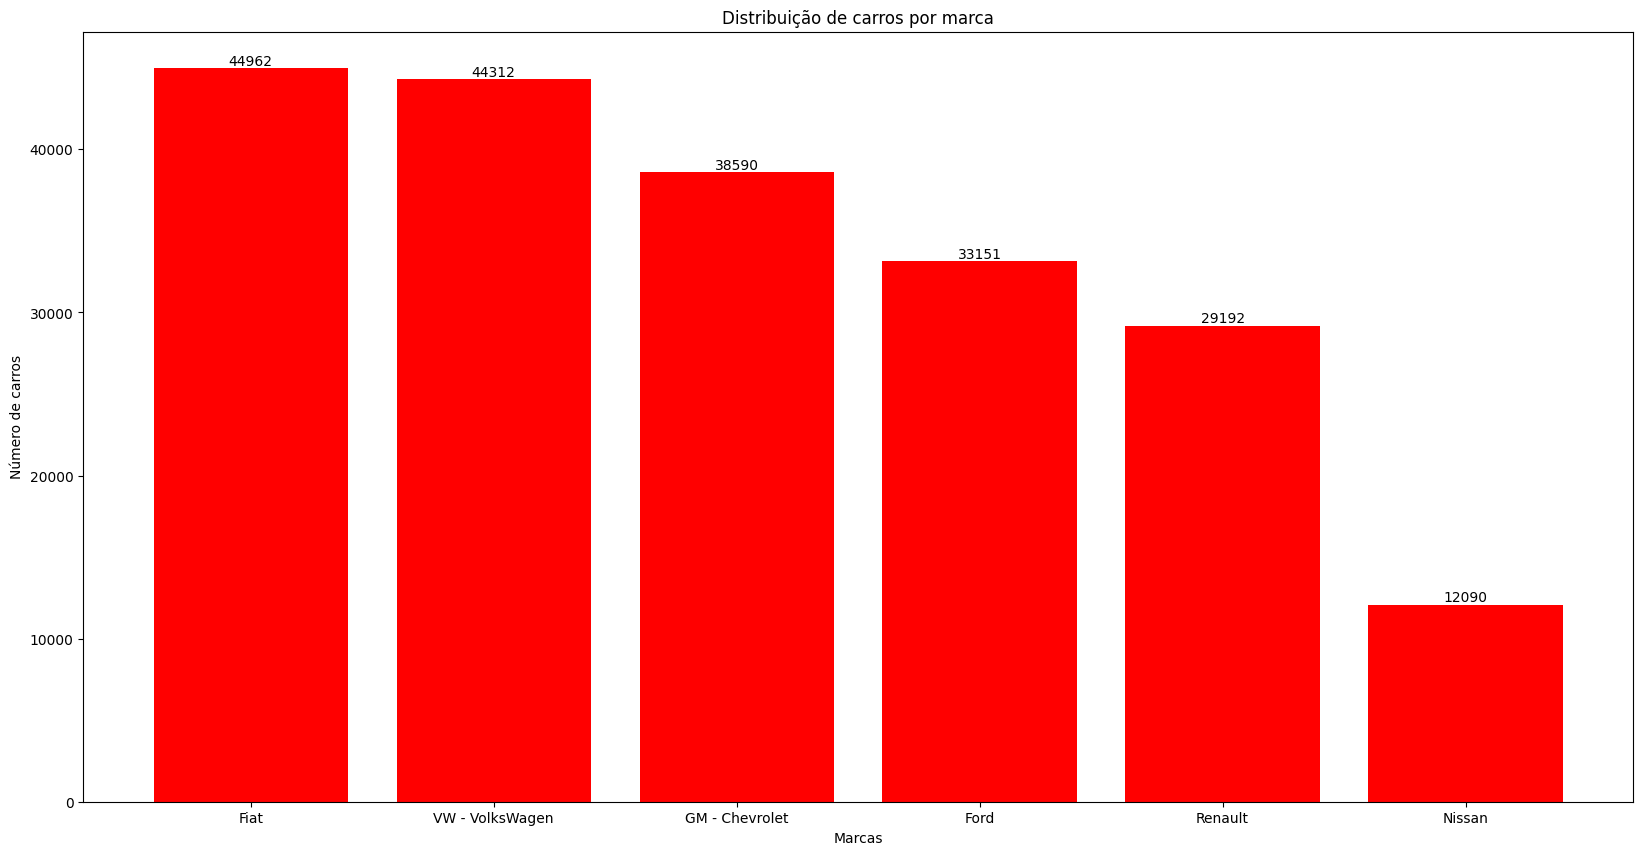

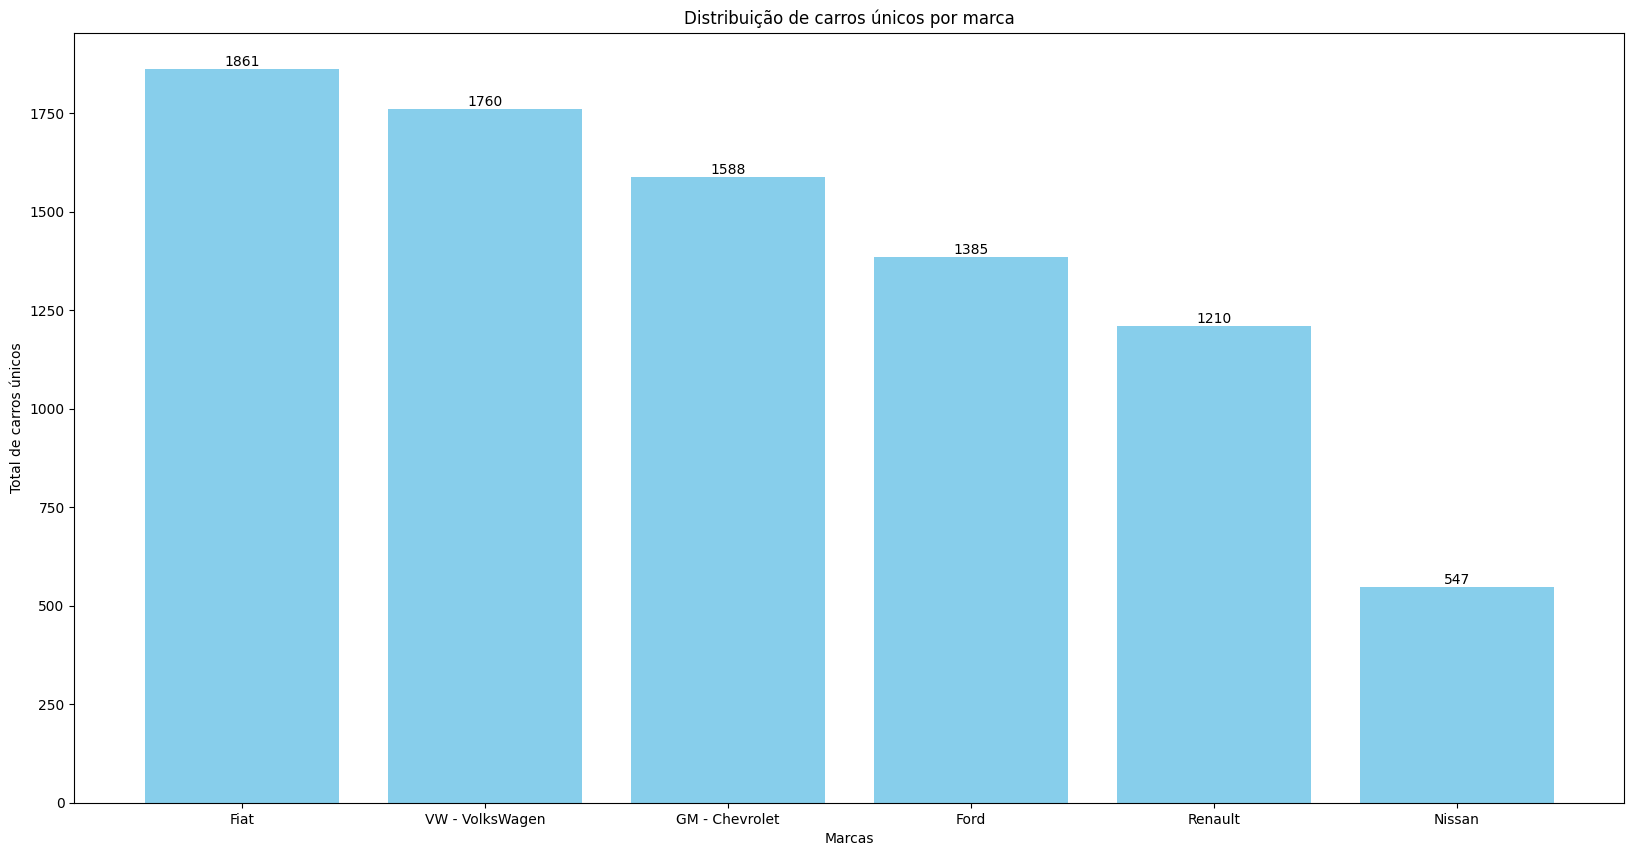

In [8]:
plot_car_count_by_brand(db)
plot_car_unique_count_by_brand(db)

In [9]:
# b. Plot the distribution of the number of cars by type of gear
def plot_car_count_by_gear_type(db):

    plt.figure(figsize=(20, 10))
    gear_count = db['gear'].value_counts()
    graphic = plt.bar(gear_count.index, gear_count.values, color='pink')

    plt.bar_label(graphic, fontsize=10)
    plt.title('Distribuição de carros por tipo de engrenagem')
    plt.xlabel('Tipo de engrenagem')
    plt.ylabel('Número de carros')
    plt.xticks(rotation=0)

    plt.show()


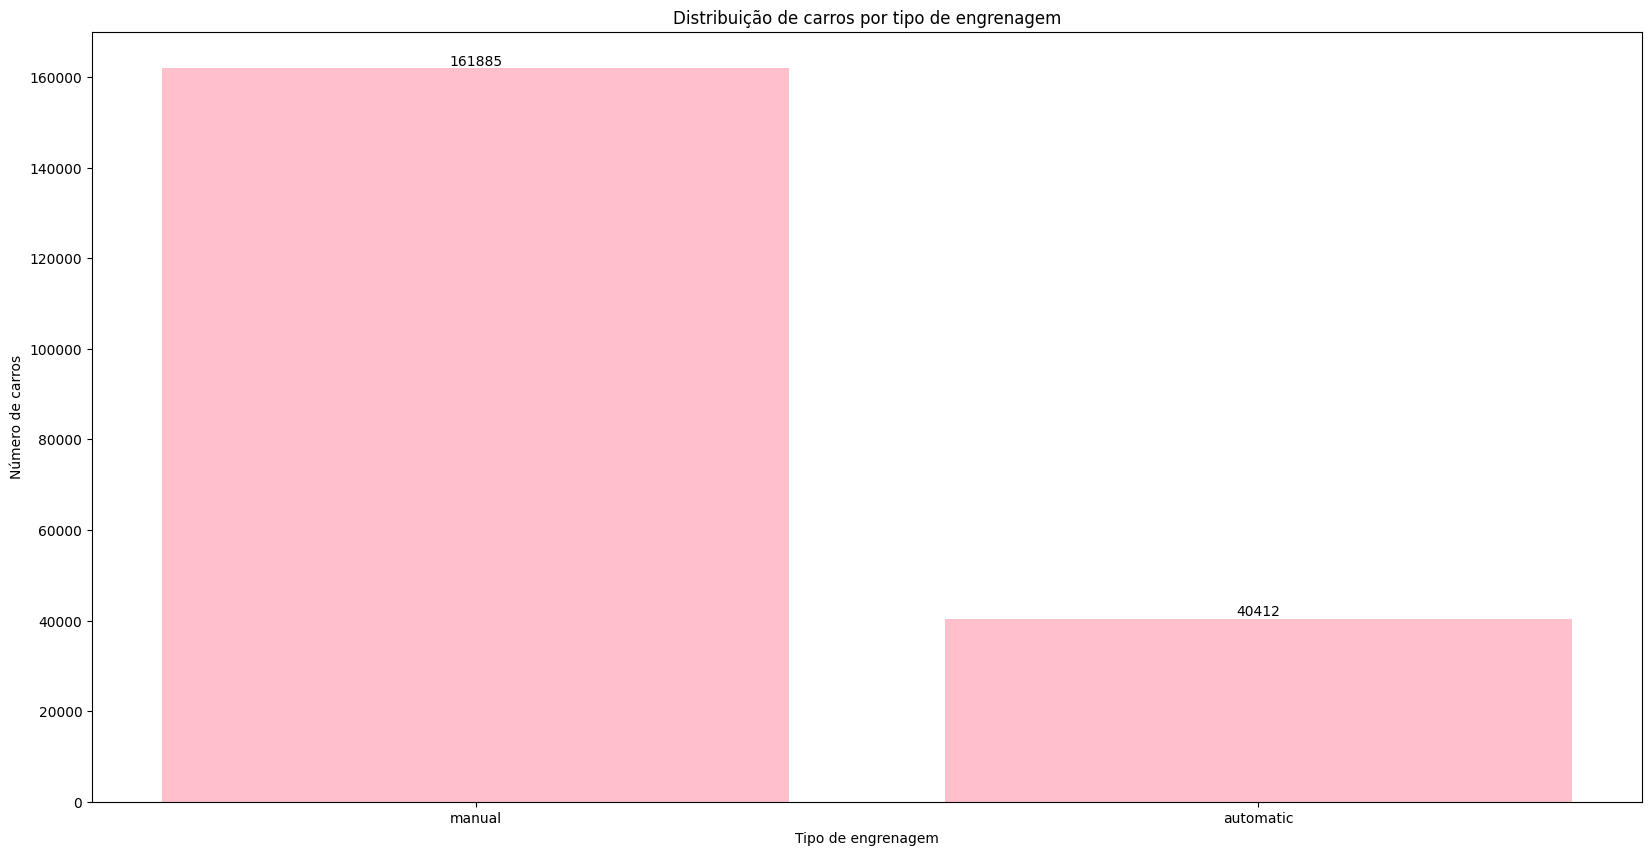

In [10]:
plot_car_count_by_gear_type(db)

In [11]:
#c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de2022 (variável de tempo no eixo X)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_price_over_time(db):
    db['year_of_reference'] = db['year_of_reference'].astype(str).str.strip()
    db['year_of_reference'] = db['year_of_reference'].str[-4:]
    db['year_of_reference'] = pd.to_numeric(db['year_of_reference'], errors='coerce')
    db = db.dropna(subset=['year_of_reference'])
    db['year_of_reference'] = db['year_of_reference'].astype(int)


    db_2022 = db[db['year_of_reference'] == 22]

    if db_2022.empty:
        print("Nenhum dado encontrado para o ano de 2022.")
        return

    avg_price = db_2022.groupby('month_of_reference')['avg_price_brl'].mean().round(2).reset_index()

    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December']

    plt.figure(figsize=(20, 10))
    sns.barplot(x='month_of_reference', y='avg_price_brl', data=avg_price, order=month_order)
    plt.xticks(rotation=45)
    plt.title('Preço Médio por Mês em 2022')
    plt.xlabel('Mês de Referência')
    plt.ylabel('Preço Médio (BRL)')
    plt.show()



float64


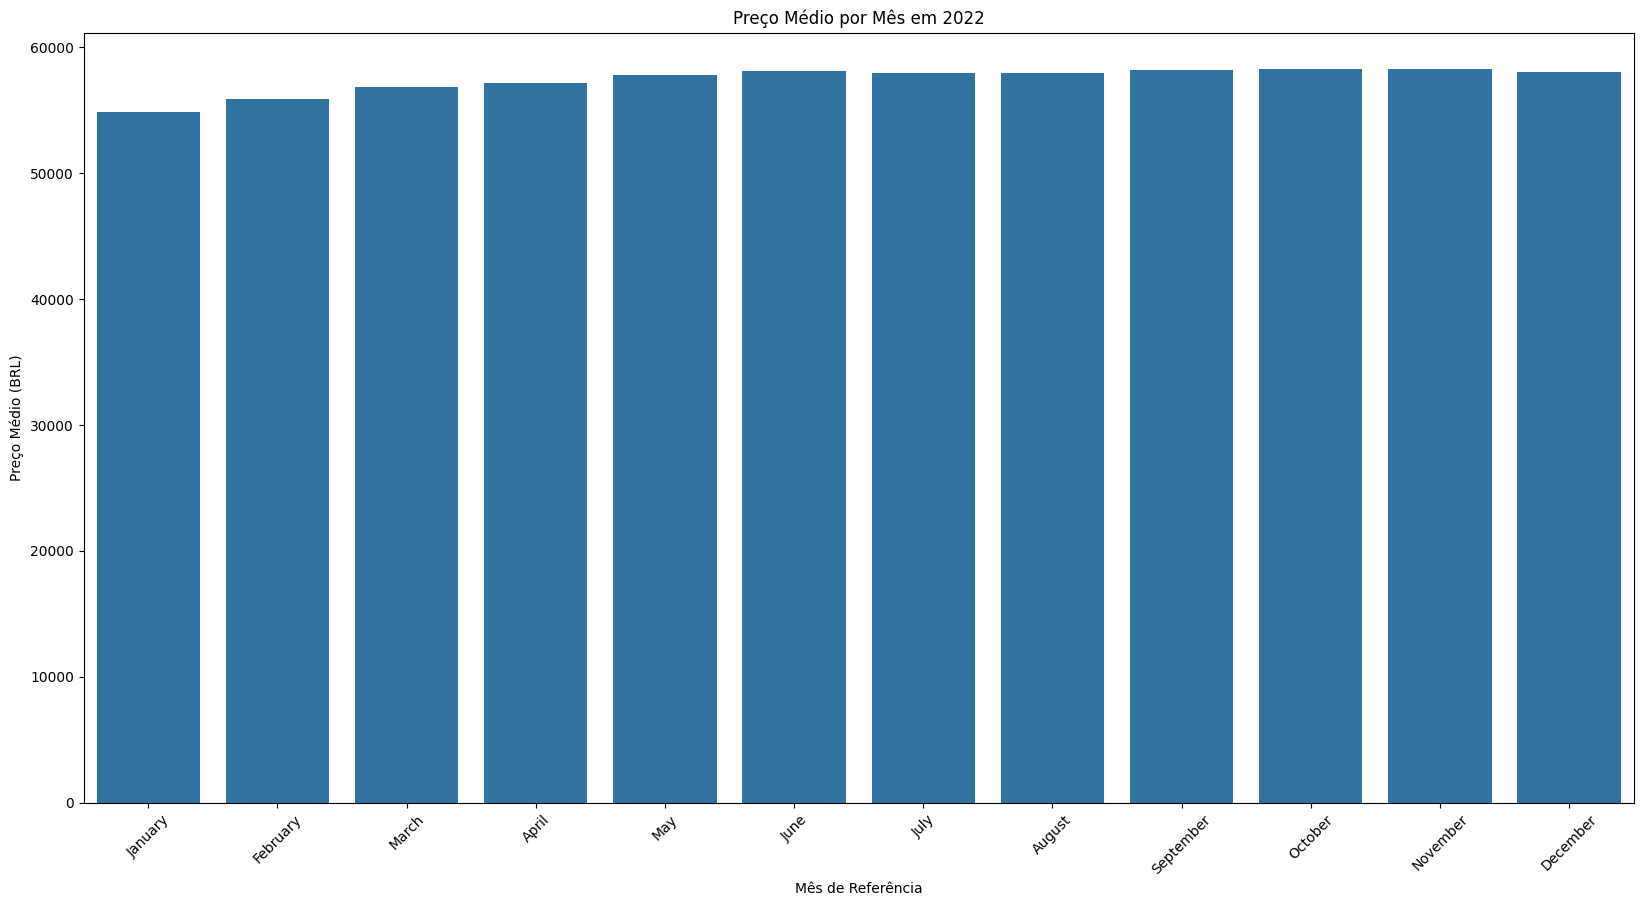

In [12]:
print(np.dtype(db['year_of_reference']))


plot_avg_price_over_time(db)

In [13]:
#d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo deengrenagem
def plot_avg_price_by_brand_and_gear(db):
    avg_price_by_brand_gear = db.groupby(['brand', 'gear'])['avg_price_brl'].mean().unstack()

    plt.figure(figsize=(20, 10))
    avg_price_by_brand_gear.plot(kind='bar', stacked=False)
    plt.title('Media do preco do carro por engrenagem e marca')
    plt.xlabel('Brand')
    plt.ylabel('Media do Preco (BRL)')
    plt.xticks(rotation=0)
    plt.legend(title='Tipo  da Engrenagem')
    plt.show()


<Figure size 2000x1000 with 0 Axes>

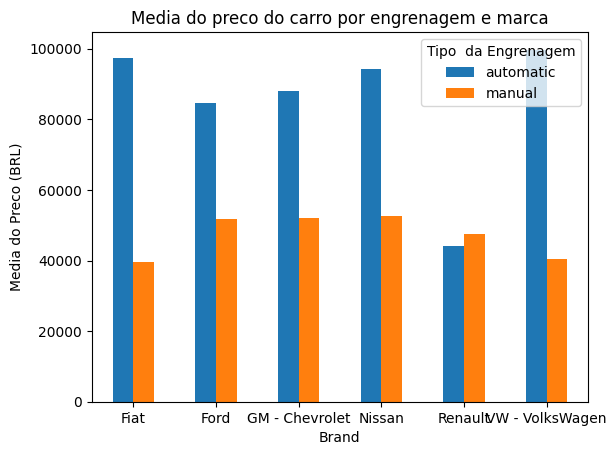

In [14]:
plot_avg_price_by_brand_and_gear(db)

In [15]:
#f Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

def plot_avg_price_by_brand_and_fuel(db):
    avg_price_by_brand_fuel = db.groupby(['brand', 'fuel'])['avg_price_brl'].mean().unstack()

    plt.figure(figsize=(20, 10))
    avg_price_by_brand_fuel.plot(kind='bar', stacked=False)
    plt.title('Média de preço dos carros por marca e tipo de combustível')
    plt.xlabel('Marca')
    plt.ylabel('Media do Preco (BRL)')
    plt.xticks(rotation=45)
    plt.legend(title='Combustivel Type')
    plt.show()

<Figure size 2000x1000 with 0 Axes>

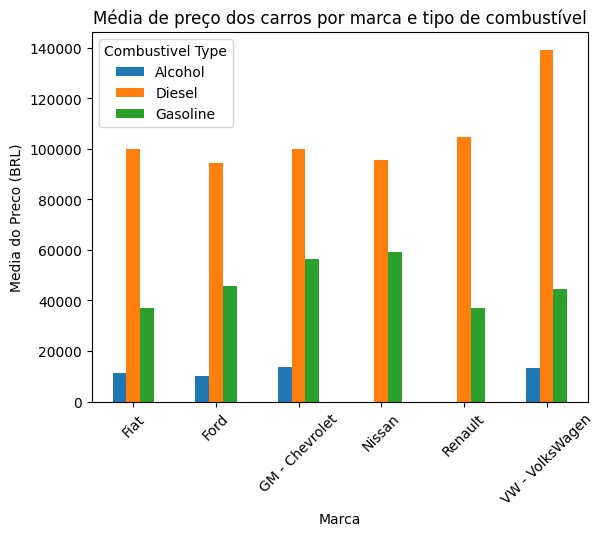

In [16]:
plot_avg_price_by_brand_and_fuel(db)

In [17]:
def convert_to_numeric(db):
  db['year_of_reference'] = db['year_of_reference'].astype(float)
  db['fuel_numeric'] = db['fuel'].replace({
  'Alcohol': 1,
  'Gasoline': 2,
  'Diesel': 3
  })
  db['fuel_numeric'] = db['fuel_numeric'].astype(float)
  db['gear_numeric'] = db['gear'].replace({
  'automatic': 1,
  'manual': 2,
  })
  db['gear_numeric'] = db['gear_numeric'].astype(float)
  db['engine_size'] = db['engine_size'].str.replace(',', '.')


  return db

In [18]:
#Parte 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder


def machine_learning_model(db):

    categorial_columns = db.select_dtypes(exclude=[np.number]).columns

    for col in categorial_columns:
        if db[col].dtype == 'object':
            le = LabelEncoder()
            db[col] = le.fit_transform(db[col].fillna("missing"))

    #a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.
    X = db.drop(columns=["avg_price_brl"])
    y = db["avg_price_brl"]

    #b. Crie partições contendo 75% dos dados para treino e 25% para teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    #c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost
    #(biblioteca XGBRegressor)
    #c. 1 -> Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    #c. 2 -> XGBRegressor
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    #d. Grave os valores preditos em variáveis criadas
    rf_predictions = rf_model.predict(X_test)
    xgb_predictions = xgb_model.predict(X_test)


    rf_mse = mean_squared_error(y_test, rf_predictions)
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_r2 = r2_score(y_test, rf_predictions)

    xgb_mse = mean_squared_error(y_test, xgb_predictions)
    xgb_mae = mean_absolute_error(y_test, xgb_predictions)
    xgb_r2 = r2_score(y_test, xgb_predictions)


    rf_importance = rf_model.feature_importances_
    xgb_importance = xgb_model.feature_importances_

    #e.Realize a análise de importância das variáveis para estimar a variável target, para cada
    #modelo treinad

    feature_names = X.columns
    print("Importância das variáveis - Random Forest:")
    for feature, importance in zip(feature_names, rf_importance):
        print(f"{feature}: {importance}")

    print("\nImportância das variáveis - XGBoost:")
    for feature, importance in zip(feature_names, xgb_importance):
        print(f"{feature}: {importance}")
    #g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R

    if rf_r2 > xgb_r2:
        print("\nModelo escolhido: RandomForestRegressor")
        best_model = "RandomForestRegressor"
        best_mse = rf_mse
        best_mae = rf_mae
        best_r2 = rf_r2
    else:
        print("\nModelo escolhido: XGBRegressor")
        best_model = "XGBRegressor"
        best_mse = xgb_mse
        best_mae = xgb_mae
        best_r2 = xgb_r2


    print(f"\n{best_model} - Resultados:")
    print(f"MSE: {best_mse}")
    print(f"MAE: {best_mae}")
    print(f"R²: {best_r2}")


    if best_model == "RandomForestRegressor":
        print("\nO modelo RandomForestRegressor teve um desempenho melhor baseado nas métricas de MSE, MAE e R².")
    else:
        print("\nO modelo XGBRegressor teve um desempenho melhor baseado nas métricas de MSE, MAE e R².")

    return best_model, best_mse, best_mae, best_r2



db = extractData(file_path)
db = patternColum(db)
db = convert_to_numeric(db)
best_model, best_mse, best_mae, best_r2 = machine_learning_model(db)


<ipython-input-3-f34971953ffd>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv(dataBaseFile)


Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')


<ipython-input-17-6ca10f1cf4c2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db['fuel_numeric'] = db['fuel'].replace({
<ipython-input-17-6ca10f1cf4c2>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db['gear_numeric'] = db['gear'].replace({


Importância das variáveis - Random Forest:
year_of_reference: 0.00015000201751926782
month_of_reference: 1.0824179597380953e-05
fipe_code: 0.006806591324575154
authentication: 0.2612201294919923
brand: 0.001867939703511724
model: 0.006721040761126544
fuel: 0.00011101886176718157
gear: 0.008111987335865854
engine_size: 0.3536233409122243
year_model: 0.2907043482230164
fuel_numeric: 0.06318122432247504
gear_numeric: 0.0074915528663289516

Importância das variáveis - XGBoost:
year_of_reference: 0.0010102057131007314
month_of_reference: 0.00011561973951756954
fipe_code: 0.02325967513024807
authentication: 0.04566916823387146
brand: 0.001510525238700211
model: 0.004453557543456554
fuel: 0.006287244614213705
gear: 0.0005535298259928823
engine_size: 0.24163946509361267
year_model: 0.15439309179782867
fuel_numeric: 0.5211079120635986
gear_numeric: 0.0

Modelo escolhido: RandomForestRegressor

RandomForestRegressor - Resultados:
MSE: 7203821.98810656
MAE: 76.91745526445872
R²: 0.997284577015891